# Info
Purpose:

    Describe the details ...

Input:

    arguments

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2022-12-05
    Modified:


# Prepare python environment

In [1]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os
from pathlib import Path

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
name = 'TASNPP'
vv = 'v1'
fp = getpath(name)


Return path named:  TASNPP /data/sam/TASNPP/


# Load files for ORACLES

## Load the MODIS ACAERO

In [3]:
flist_modis = [str(p) for p in Path(fp+'2016/').rglob('*.nc')]
flist_modis.sort()
flist_modis

['/data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.0805.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.0935.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.0940.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.0945.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.1115.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.1120.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.1125.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.1250.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MYD06ACAERO_L2.A2016240.1225.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MYD06ACAERO_L2.A2016240.1230.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MYD06ACAERO_L2.A2016240.1235.061.LUTTest.ORACLES_2016.nc',
 '/data/sam/TASNPP/2016/240/MYD06ACAERO_L2.

In [4]:
f

NameError: name 'f' is not defined

In [53]:
import importlib
importlib.reload(load_utils)

<module 'load_utils' from '/home/sam/python_codes/load_utils.py'>

In [5]:
mod,modd = [],[]
for f in flist_modis:
    print('loading file: '+f)
    mtmp,mtmp_dict = lu.load_hdf(f,all_values=True,verbose=False)
    mod.append(mtmp)
    modd.append(mtmp_dict)

loading file: /data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.0805.061.LUTTest.ORACLES_2016.nc
loading file: /data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.0935.061.LUTTest.ORACLES_2016.nc
loading file: /data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.0940.061.LUTTest.ORACLES_2016.nc
loading file: /data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.0945.061.LUTTest.ORACLES_2016.nc
loading file: /data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.1115.061.LUTTest.ORACLES_2016.nc
loading file: /data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.1120.061.LUTTest.ORACLES_2016.nc
loading file: /data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.1125.061.LUTTest.ORACLES_2016.nc
loading file: /data/sam/TASNPP/2016/240/MOD06ACAERO_L2.A2016240.1250.061.LUTTest.ORACLES_2016.nc
loading file: /data/sam/TASNPP/2016/240/MYD06ACAERO_L2.A2016240.1225.061.LUTTest.ORACLES_2016.nc
loading file: /data/sam/TASNPP/2016/240/MYD06ACAERO_L2.A2016240.1230.061.LUTTest.ORACLES_2016.nc
loading file: /data/sam/TASNPP

KeyboardInterrupt: 

In [14]:
f

'/data/sam/TASNPP/2016/246/MOD06ACAERO_L2.A2016246.1035.061.LUTTest.ORACLES_2016.nc'

In [13]:
mod[0]

{'/geolocation_data/latitude': array([[-30.89132 , -30.903532, -30.915672, ..., -34.512665, -34.51508 ,
         -34.517487],
        [-30.873703, -30.88597 , -30.898249, ..., -34.49444 , -34.496796,
         -34.499146],
        [-30.856083, -30.868431, -30.880825, ..., -34.476215, -34.47851 ,
         -34.48081 ],
        ...,
        [-13.435046, -13.443676, -13.452254, ..., -16.56278 , -16.56682 ,
         -16.570866],
        [-13.417198, -13.425869, -13.434489, ..., -16.544815, -16.548792,
         -16.552794],
        [-13.399358, -13.408045, -13.416743, ..., -16.526834, -16.530767,
         -16.53471 ]], dtype=float32),
 '/geolocation_data/longitude': array([[17.503208, 17.552608, 17.601805, ..., 42.32632 , 42.379196,
         42.43249 ],
        [17.509295, 17.558666, 17.608196, ..., 42.327168, 42.38003 ,
         42.433315],
        [17.515362, 17.564827, 17.614576, ..., 42.32803 , 42.380882,
         42.43416 ],
        ...,
        [23.456858, 23.50065 , 23.544218, ..., 44.

## Load the 4STAR for 2016

## Load the HSRL for 2016

# Plot out data

## Make maps of MODIS ACAERO

In [15]:
modd[0]['/geophysical_data/Above_Cloud_AOD']

{'/geophysical_data/Above_Cloud_AOD#add_offset': '0',
 '/geophysical_data/Above_Cloud_AOD#long_name': 'Above-Cloud Aerosol Optical Depth using ORACLES 2016 4STAR aerosol scattering properties',
 '/geophysical_data/Above_Cloud_AOD#scale_factor': '0.009999999776482582',
 '/geophysical_data/Above_Cloud_AOD#units': 'none',
 '/geophysical_data/Above_Cloud_AOD#valid_max': '400',
 '/geophysical_data/Above_Cloud_AOD#valid_min': '0',
 '/geophysical_data/Above_Cloud_AOD#_FillValue': '-9999'}

In [36]:
def make_acaod(m,md):
    acaod = np.ma.masked_array(m['/geophysical_data/Above_Cloud_AOD'],m['/geophysical_data/Above_Cloud_AOD']==float(md['/geophysical_data/Above_Cloud_AOD']['/geophysical_data/Above_Cloud_AOD#_FillValue']))
    acaod = acaod*float(md['/geophysical_data/Above_Cloud_AOD']['/geophysical_data/Above_Cloud_AOD#scale_factor'])
    return acaod

<IPython.core.display.Javascript object>


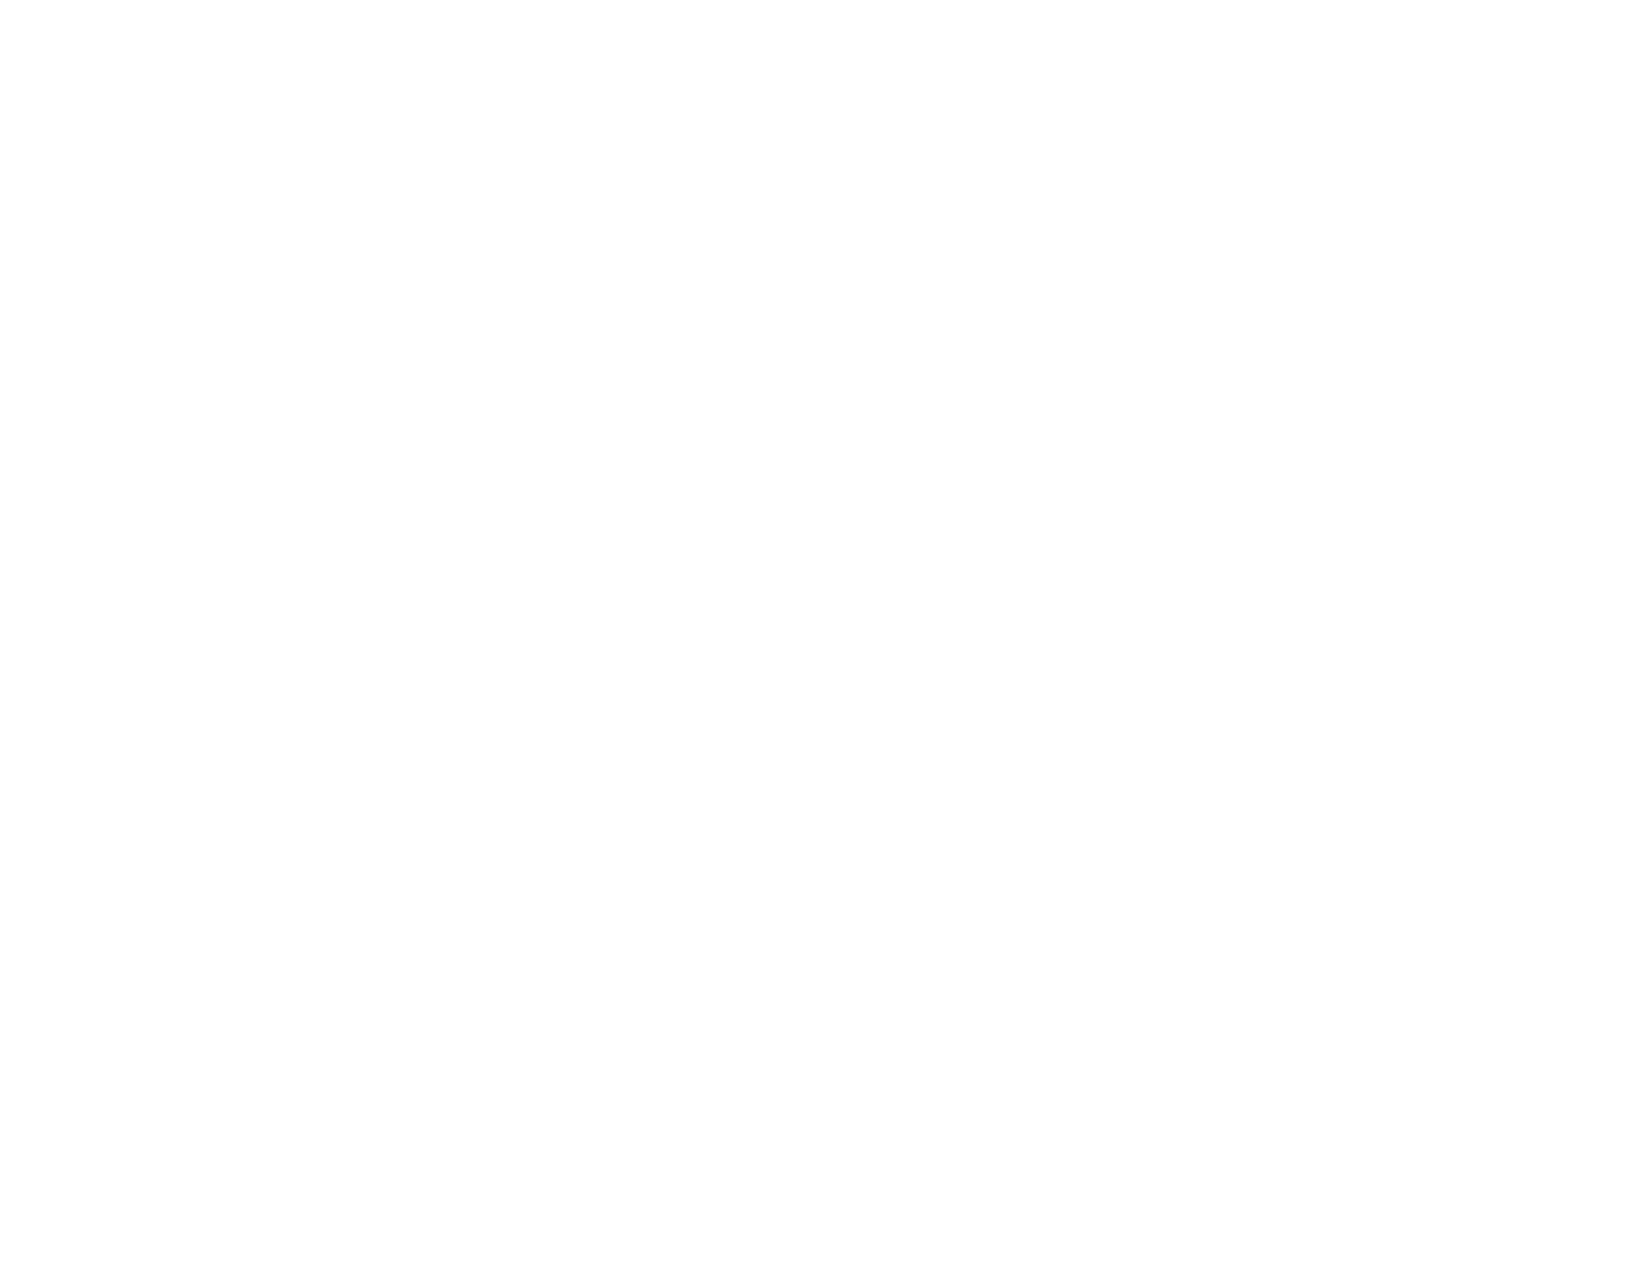

In [44]:
fig = plt.figure(figsize=(9,7))
proj = ccrs.PlateCarree()#(-120, 45)#(central_latitude=np.nanmean(nav['FMS_LAT']), central_longitude=np.nanmean(nav['FMS_LON']))
ax = fig.add_subplot(111,projection=proj)
for i in range(16):
    axs = ax.scatter(mod[i]['/geolocation_data/longitude'],mod[i]['/geolocation_data/latitude'],c=make_acaod(mod[i],modd[i]),marker='o',s=6,vmin=0.0,vmax=1.0)
    #ax.scatter(nav['FMS_LON'][ifl],nav['FMS_LAT'][ifl],c='r',marker='x',s=12)

ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True,auto_update=True)

cbar_ax = fig.add_axes([0, 0, 0.1, 0.1])
fig.subplots_adjust(hspace=0.0, wspace=0, top=0.925, left=0.06)
posn = ax.get_position()
ax.set_position([posn.x0, posn.y0, posn.width-0.1, posn.height])
posn = ax.get_position()
cbar_ax.set_position([posn.x0 + posn.width + 0.07, posn.y0,
                          0.02, posn.height])

cbar = plt.colorbar(axs,cax=cbar_ax,label='ACAERO AOD')

   # ax.set_title('ORACLES - NASA P-3 - {}'.format(flist_modis[i]))
   # if i>16: break
plt.savefig(fp+'ORACLES_MODIS_ACAERO_AOD1_map_doy240.png',dpi=400,transparent=True)